# 時系列モデルの評価指標
## RMSE（Root Mean Squared Error）
MSEの平方根  
元のデータの単位で表されるため、解釈しやすい  
RMSEも小さいほど、良い予測性能
## MAPE（Mean Absolute Percentage Error）
各予測誤差の絶対値を、実際の値で割った割合の平均をパーセント表示したもの  
スケールが異なるデータでも比較しやすい   
実際の値が0に近いと大きくなりがち  
MAPEが低いほど、予測値が実際の値と比較して相対的に正確であることを示す
## SMAPE（Symmetric Mean Absolute Percentage Error）
MAPEの対称版で、実際の値と予測値の両方に対して正規化することで、0近傍の値に対する影響を軽減  
双方に対して対称的な誤差評価が可能  
SMAPEも小さいほど予測の相対誤差が少ないことを示す  
実際の値が0に近いケースでの過大な誤差の影響を抑えられるのが利点

RMSE : 0.1792
MAPE : 42.3184%
SMAPE: 37.1743%


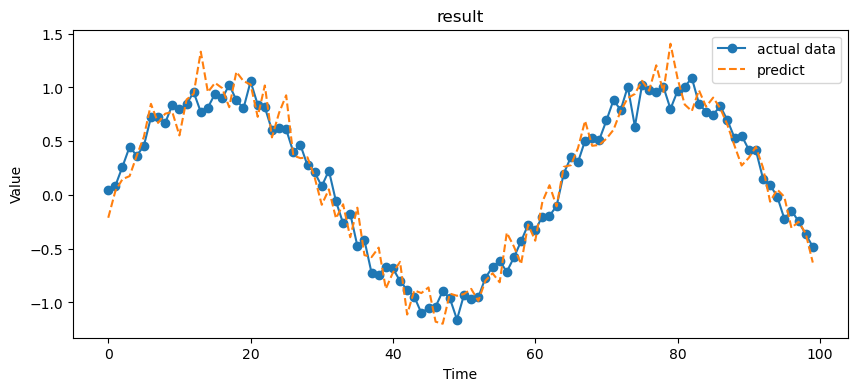

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 乱数シードの設定
np.random.seed(42)

# サンプルの時系列データ（100点）を生成
t = np.arange(100)
# 真の時系列データ（例：サイン波にノイズを加えたもの）
y_true = np.sin(0.1 * t) + np.random.normal(scale=0.1, size=100)
# 予測値（例：同じサイン波にノイズを加えたもの）
y_pred = np.sin(0.1 * t) + np.random.normal(scale=0.15, size=100)

# RMSEの計算
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAPEの計算
epsilon = 1e-10
mape = np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon))) * 100

# SMAPEの計算
smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + epsilon)) * 100

print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.4f}%")
print(f"SMAPE: {smape:.4f}%")

# 結果のプロット
plt.figure(figsize=(10, 4))
plt.plot(t, y_true, label='actual data', marker='o')
plt.plot(t, y_pred, label='predict', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("result")
plt.legend()
plt.show()
